<a href="https://colab.research.google.com/github/xbracaa/Sistem-Pakar-Certainty-Factor-Fuzzy-Logic-/blob/main/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.6 MB/s eta 0:00:00


Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 25.00%


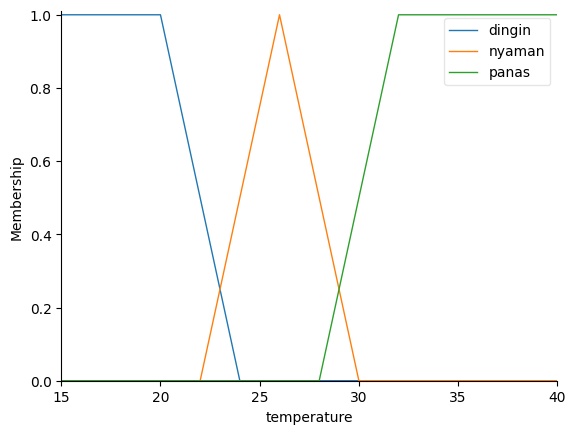

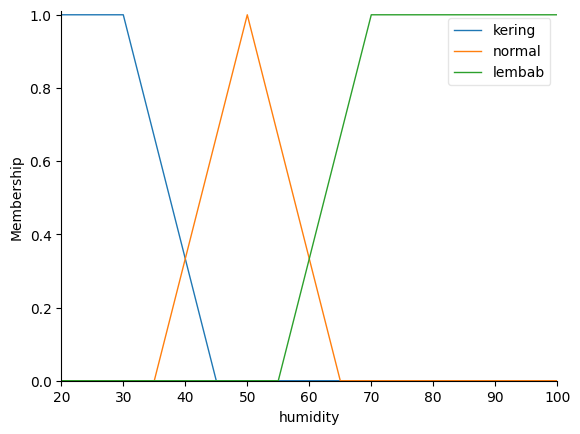

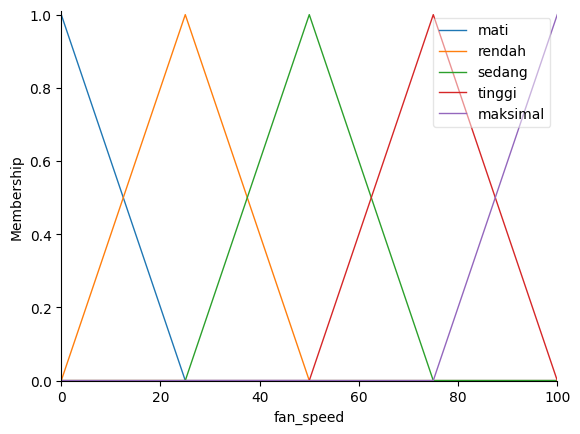

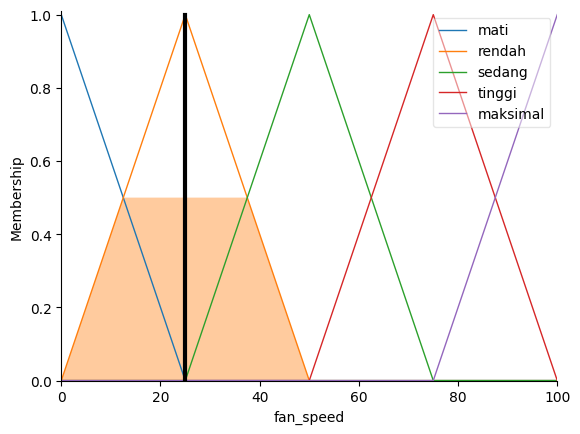

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])

rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])

rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])

# Tambahan aturan baru:
rule10 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])  # contoh aturan tambahan

# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values
ac.input['temperature'] = 22  # Diubah dari 30 ke 22
ac.input['humidity'] = 75

# Compute result
ac.compute()
print(f"Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=ac)
plt.show()

#Penjelasan
1. Perubahan Input Suhu ke 22°C

Saat suhu diubah dari 30°C menjadi 22°C, nilai suhu ini masuk ke dua kategori dalam sistem fuzzy, yaitu "dingin" dan "nyaman". Kenapa bisa begitu? Karena dalam fuzzy logic, satu nilai bisa masuk ke lebih dari satu kategori, dengan tingkat keanggotaan yang berbeda. Jadi, suhu 22°C itu memiliki keanggotaan di kategori "dingin" dan "nyaman", yang berarti kedua aturan yang mengandung suhu tersebut bisa berlaku.

Karena kelembabannya 75% (yang berarti “lembab”), maka aturan-aturan yang melibatkan "lembab" akan berpengaruh, misalnya:

Jika suhu "dingin" dan "lembab", maka kipas akan bergerak pelan.

*   Item daftar
*   Item daftar


Kalau suhu "nyaman" dan "lembab", maka kipas bergerak lebih cepat.

Akhirnya, kecepatan kipas akan jadi hasil gabungan dari aturan-aturan ini.

2. Penambahan Aturan Baru

Saya juga menambahkan aturan baru, yaitu jika suhu "nyaman" dan kelembaban "kering", maka kecepatan kipas akan rendah. Tapi pada kasus ini, kelembaban 75% (lembab), jadi aturan ini tidak berpengaruh. Namun, jika kelembabannya lebih rendah (lebih kering), aturan ini bisa jadi penting dan mempengaruhi hasil.

3. Kenapa Suhu 28°C Bisa Masuk ke Dua Kategori?

Dalam fuzzy logic, suhu 28°C bisa masuk ke dua kategori sekaligus, yaitu “nyaman” dan “panas”. Ini terjadi karena fungsi keanggotaan dalam fuzzy logic itu bentuknya bisa overlapping (tumpang tindih).

"Nyaman" punya rentang suhu 22°C hingga 30°C.

*   Item daftar
*   Item daftar



"Panas" mulai dari 28°C dan terus naik.

Karena suhu 28°C berada di batas antara kedua rentang tersebut, dia bisa memiliki nilai keanggotaan di kedua kategori, walaupun dengan tingkat yang berbeda-beda. Ini yang bikin fuzzy logic bisa lebih fleksibel dan sesuai dengan kondisi nyata, di mana suatu kondisi bisa tergolong ke lebih dari satu kategori.